In [34]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

import keras.layers as L
import keras as K
import keras.layers as L
import os
import cv2
from keras import backend as K
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [35]:
training_folder_dir = './Linnaeus 5 128X128/train'
test_folder_dir = './Linnaeus 5 128X128/test'

img_size = (128, 128)

class_names = sorted(os.listdir(training_folder_dir))
class_names

['berry', 'bird', 'dog', 'flower', 'other']

# show one image from each set

berry
./Linnaeus 5 128X128/train\berry


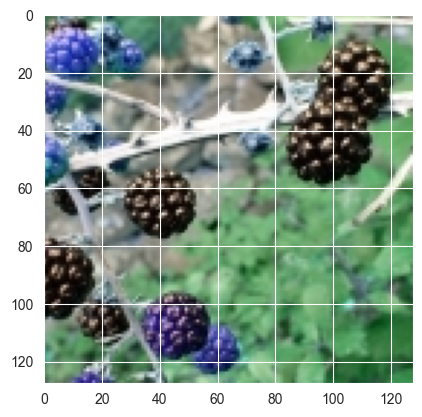

bird
./Linnaeus 5 128X128/train\bird


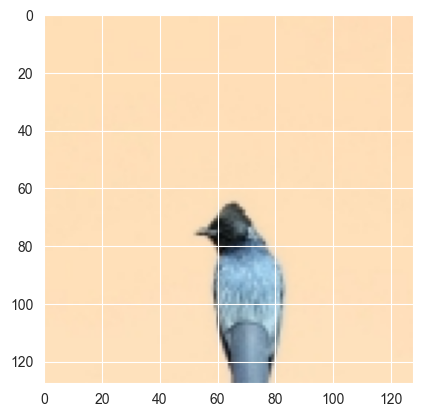

dog
./Linnaeus 5 128X128/train\dog


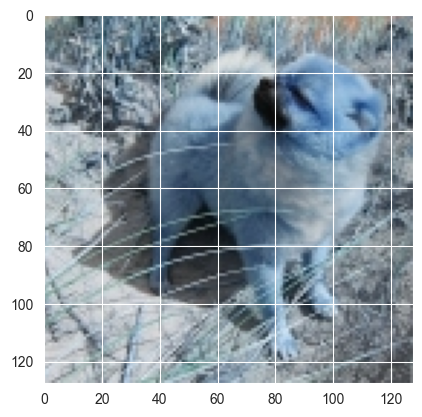

flower
./Linnaeus 5 128X128/train\flower


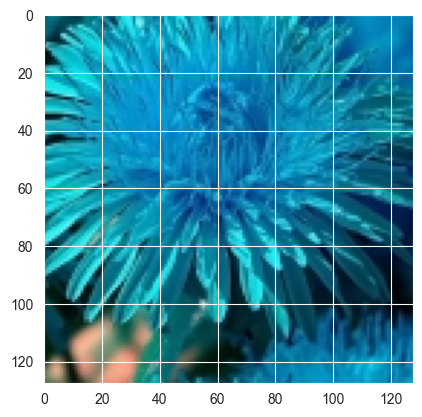

other
./Linnaeus 5 128X128/train\other


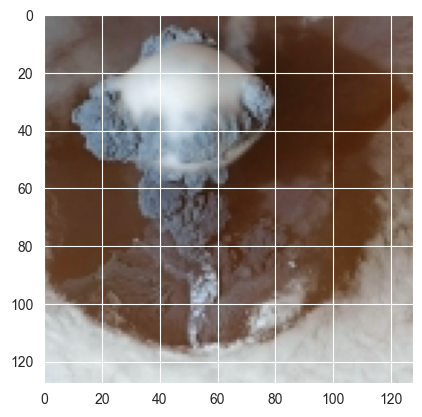

In [36]:
for category in class_names:
    print(category)
    path = os.path.join(training_folder_dir, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break

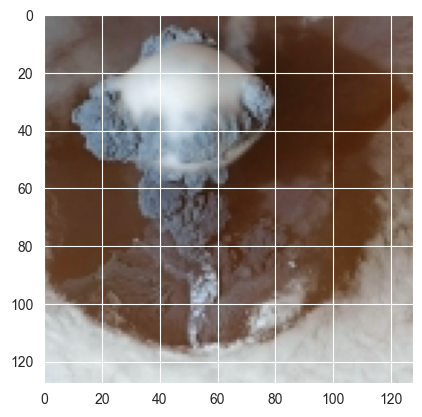

In [37]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [38]:
training_folder_dir

'./Linnaeus 5 128X128/train'

In [39]:
class_names

['berry', 'bird', 'dog', 'flower', 'other']

In [40]:
def create_dataset(data_path):
    training_data = []
    for i in range(len(class_names)):
        category = class_names[i]
        path = os.path.join(data_path, category)
        print(path)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, i])

    return training_data

In [41]:
train_data = create_dataset(training_folder_dir)
test_data = create_dataset(test_folder_dir)

./Linnaeus 5 128X128/train\berry
./Linnaeus 5 128X128/train\bird
./Linnaeus 5 128X128/train\dog
./Linnaeus 5 128X128/train\flower
./Linnaeus 5 128X128/train\other
./Linnaeus 5 128X128/test\berry
./Linnaeus 5 128X128/test\bird
./Linnaeus 5 128X128/test\dog
./Linnaeus 5 128X128/test\flower
./Linnaeus 5 128X128/test\other


In [12]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

len(train_data), len(test_data)

(6000, 2000)

In [13]:
def extract_X_y(data):
    X = []
    y = []
    for features, label in data:
        X.append(features)
        y.append(label)
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [14]:
train_X, train_y = extract_X_y(train_data)
test_X, test_y = extract_X_y(test_data)

# Q1

In [63]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1. / 255, input_shape=(128, 128, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])


In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)       

In [66]:
import time

epochs = 15

start = time.time()
history = model.fit(
    x=train_X,
    y=train_y,
    validation_split=0.1,
    batch_size=32,
    epochs=epochs
)
end = time.time() - start

Epoch 1/15
169/169 [==============================] - 74s 438ms/step - loss: 1.3110 - accuracy: 0.4313 - val_loss: 1.2200 - val_accuracy: 0.4767
Epoch 2/15
169/169 [==============================] - 73s 435ms/step - loss: 1.0685 - accuracy: 0.5709 - val_loss: 1.1231 - val_accuracy: 0.5433
Epoch 3/15
169/169 [==============================] - 74s 437ms/step - loss: 0.9486 - accuracy: 0.6172 - val_loss: 1.0081 - val_accuracy: 0.5783
Epoch 4/15
169/169 [==============================] - 75s 446ms/step - loss: 0.8179 - accuracy: 0.6826 - val_loss: 1.0236 - val_accuracy: 0.5667
Epoch 5/15
169/169 [==============================] - 76s 448ms/step - loss: 0.6641 - accuracy: 0.7489 - val_loss: 0.9544 - val_accuracy: 0.6150
Epoch 6/15
169/169 [==============================] - 72s 426ms/step - loss: 0.5009 - accuracy: 0.8100 - val_loss: 1.0799 - val_accuracy: 0.6450
Epoch 7/15
169/169 [==============================] - 71s 423ms/step - loss: 0.3725 - accuracy: 0.8631 - val_loss: 1.0249 - val_ac

In [67]:
print("Total time: ", end, "seconds")

Total time:  1086.2040882110596 seconds


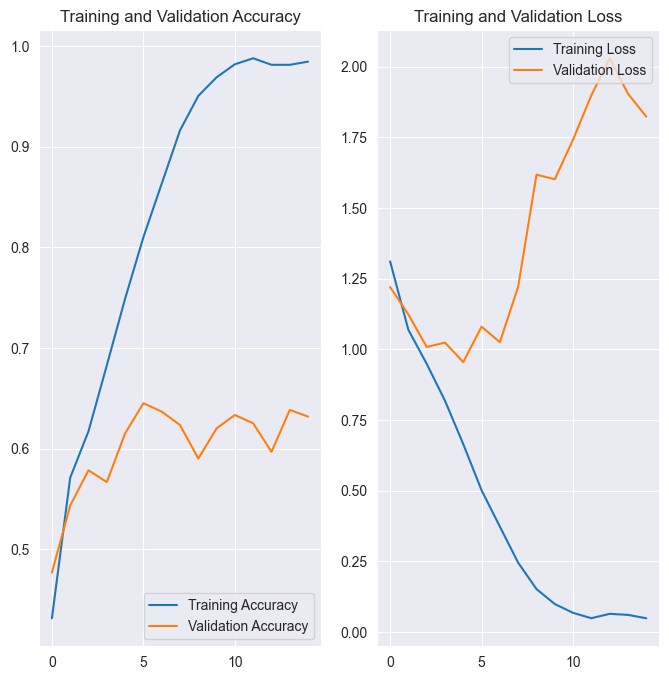

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
pred = model.predict(test_X)
pred = pred.argmax(axis=1)
pred

63/63 [==============================] - 3s 54ms/step


array([4, 0, 1, ..., 3, 0, 2], dtype=int64)

In [73]:
accuracy_score(test_y, pred)

0.621

In [74]:
confusion_matrix(test_y, pred)

array([[238,  45,  28,  65,  24],
       [ 20, 212,  70,  30,  68],
       [  4,  93, 265,   7,  31],
       [ 37,  30,   8, 302,  23],
       [ 28,  80,  43,  24, 225]], dtype=int64)

# try 2 for Q1

In [65]:
num_classes = len(class_names)

model_q1_2 = Sequential([
    layers.Rescaling(1. / 255, input_shape=(128, 128, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Conv2D(32, 5, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Conv2D(64, 7, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Conv2D(128, 7, padding='same', activation='relu'),
    layers.AvgPool2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

In [66]:
model_q1_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_q1_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 average_pooling2d_16 (Avera  (None, 64, 64, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 average_pooling2d_17 (Avera  (None, 32, 32, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)       

In [67]:
import time
epochs = 13

start = time.time()
history = model_q1_2.fit(
    x=train_X,
    y=train_y,
    validation_split=0.1,
    batch_size=32,
    epochs=epochs
)
end = time.time() - start

Epoch 1/13
169/169 [==============================] - 49s 287ms/step - loss: 1.4410 - accuracy: 0.3137 - val_loss: 1.2703 - val_accuracy: 0.4183
Epoch 2/13
169/169 [==============================] - 47s 280ms/step - loss: 1.2620 - accuracy: 0.4331 - val_loss: 1.1446 - val_accuracy: 0.5083
Epoch 3/13
169/169 [==============================] - 48s 282ms/step - loss: 1.1820 - accuracy: 0.5024 - val_loss: 1.1096 - val_accuracy: 0.5300
Epoch 4/13
169/169 [==============================] - 48s 282ms/step - loss: 1.0698 - accuracy: 0.5565 - val_loss: 1.0259 - val_accuracy: 0.5917
Epoch 5/13
169/169 [==============================] - 51s 303ms/step - loss: 0.9864 - accuracy: 0.5970 - val_loss: 1.0354 - val_accuracy: 0.5817
Epoch 6/13
169/169 [==============================] - 55s 323ms/step - loss: 0.9219 - accuracy: 0.6350 - val_loss: 0.9998 - val_accuracy: 0.6017
Epoch 7/13
169/169 [==============================] - 55s 325ms/step - loss: 0.8490 - accuracy: 0.6589 - val_loss: 0.9556 - val_ac

In [91]:
print("Total time: ", end, "seconds")


Total time:  674.8484659194946 seconds


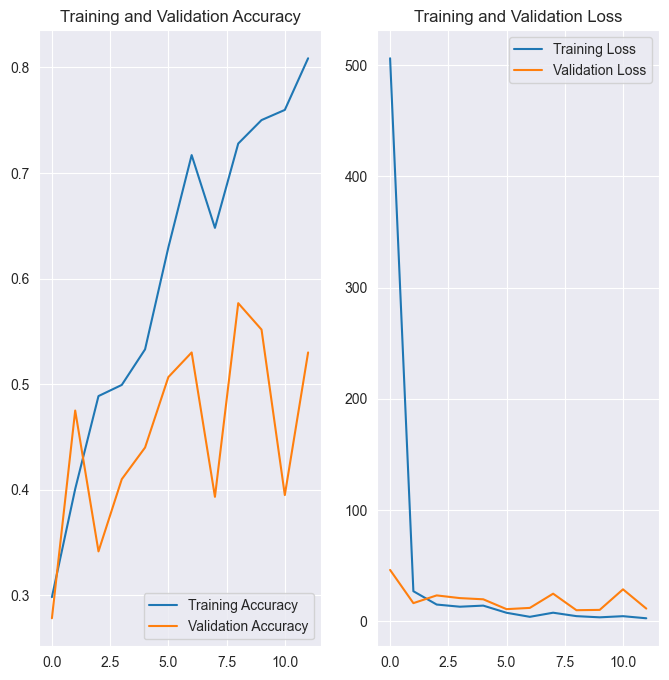

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [95]:
pred = model_q1_2.predict(test_X)
pred = pred.argmax(axis=1)

63/63 [==============================] - 3s 53ms/step


In [96]:
accuracy_score(test_y, pred)

0.679

In [97]:
confusion_matrix(test_y, pred)

array([[285,  30,  19,  41,  25],
       [ 25, 220,  66,  15,  74],
       [  2,  52, 325,   0,  21],
       [ 54,  21,  13, 282,  30],
       [ 25,  73,  32,  24, 246]], dtype=int64)

# Q2

In [124]:
import keras.layers as L
import keras as K

x_in = L.Input((IMG_SIZE, IMG_SIZE, 3))
x_in = L.RandomFlip('horizontal')(x_in)
x_in = L.RandomRotation(0.2)(x_in)

# left_side
left_side = L.Resizing(height=29, width=29, interpolation="bilinear", crop_to_aspect_ratio=False)(x_in)  # 63
left_side = L.Dense(units=32, activation="relu")(left_side)
# flat_flatten = L.Flatten()(x_in)
# flat_hidden = L.Dense(units=128, activation="sigmoid")(flat_flatten)
# flat_out = shared_weights(flat_hidden)


# right_side
conv = L.Conv2D(filters=16, kernel_size=3, activation="relu")(x_in)  # 128 -> 126
conv = L.AvgPool2D()(conv)  # 63
conv = L.Conv2D(filters=32, kernel_size=5, activation="relu")(conv)  # 63 -> 61
conv = L.AvgPool2D()(conv)  # 61 - 30
# conv = L.Conv2D(filters=128, kernel_size=3, activation="sigmoid")(conv) # 3 - 1
# conv_flat = L.Flatten()(conv)
# conv_out = shared_weights(conv_flat)

# comb1
comb1 = L.Concatenate()([conv, left_side])

# left_side
left_side2 = L.Resizing(height=2, width=2)(comb1)
left_side2 = L.Dense(units=128, activation="relu")(left_side2)

# right_side
right_conv = L.Conv2D(filters=64, kernel_size=7, activation="relu")(comb1)  # 30 -> 28
right_conv = L.AvgPool2D()(right_conv)  # 24
right_conv = L.Conv2D(filters=128, kernel_size=7, activation="relu")(right_conv)  # 24 -> 22
right_conv = L.AvgPool2D()(right_conv)  # 22 - 11

#comb2
comb2 = L.Concatenate()([right_conv, left_side2])
comb2 = L.Flatten()(comb2)
comb2 = L.Dense(units=256)(comb2)
comb_out = L.Dense(units=num_classes, activation="softmax")(comb2)

# conv branch
new_model = K.Model(inputs=x_in, outputs=comb_out)
new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_y_eye = np.eye(5)[train_y]
start = time.time()
history = new_model.fit(x=train_X, y=train_y_eye, batch_size=32, epochs=15, validation_split=0.1,
                        callbacks=[K.callbacks.TensorBoard()])
duration = time.time() - start

Epoch 1/15
169/169 [==============================] - 35s 203ms/step - loss: 8.7624 - accuracy: 0.3161 - val_loss: 1.7043 - val_accuracy: 0.3483
Epoch 2/15
169/169 [==============================] - 38s 224ms/step - loss: 1.6506 - accuracy: 0.3613 - val_loss: 1.5044 - val_accuracy: 0.3850
Epoch 3/15
169/169 [==============================] - 38s 224ms/step - loss: 1.4298 - accuracy: 0.4020 - val_loss: 1.3774 - val_accuracy: 0.4417
Epoch 4/15
169/169 [==============================] - 37s 218ms/step - loss: 1.3754 - accuracy: 0.4228 - val_loss: 1.3808 - val_accuracy: 0.4100
Epoch 5/15
169/169 [==============================] - 35s 204ms/step - loss: 1.3241 - accuracy: 0.4400 - val_loss: 1.4273 - val_accuracy: 0.3867
Epoch 6/15
169/169 [==============================] - 36s 212ms/step - loss: 1.3091 - accuracy: 0.4515 - val_loss: 1.4031 - val_accuracy: 0.3950
Epoch 7/15
169/169 [==============================] - 34s 204ms/step - loss: 1.2906 - accuracy: 0.4606 - val_loss: 1.3945 - val_ac

In [116]:
train_y_eye = np.eye(5)[train_y]

In [ ]:
start = time.time()
history = new_model.fit(x=train_X, y=train_y_eye, batch_size=128, epochs=15, validation_split=0.1,
                        callbacks=[K.callbacks.TensorBoard()])
duration = time.time() - start

In [117]:
start = time.time()
history = new_model.fit(x=train_X, y=train_y_eye, batch_size=128, epochs=15, validation_split=0.1,
                        callbacks=[K.callbacks.TensorBoard()])
duration = time.time() - start

Epoch 1/15
43/43 [==============================] - 33s 740ms/step - loss: 21.8339 - accuracy: 0.2524 - val_loss: 2.2042 - val_accuracy: 0.3300
Epoch 2/15
43/43 [==============================] - 31s 716ms/step - loss: 1.8084 - accuracy: 0.3467 - val_loss: 1.7280 - val_accuracy: 0.4000
Epoch 3/15
43/43 [==============================] - 31s 718ms/step - loss: 1.5334 - accuracy: 0.3883 - val_loss: 1.5425 - val_accuracy: 0.4050
Epoch 4/15
43/43 [==============================] - 31s 720ms/step - loss: 1.5160 - accuracy: 0.4002 - val_loss: 1.8799 - val_accuracy: 0.3367
Epoch 5/15
43/43 [==============================] - 31s 717ms/step - loss: 1.6880 - accuracy: 0.3885 - val_loss: 1.8132 - val_accuracy: 0.3517
Epoch 6/15
43/43 [==============================] - 31s 720ms/step - loss: 1.4770 - accuracy: 0.4172 - val_loss: 1.5762 - val_accuracy: 0.4217
Epoch 7/15
43/43 [==============================] - 35s 816ms/step - loss: 1.3967 - accuracy: 0.4339 - val_loss: 1.4839 - val_accuracy: 0.398

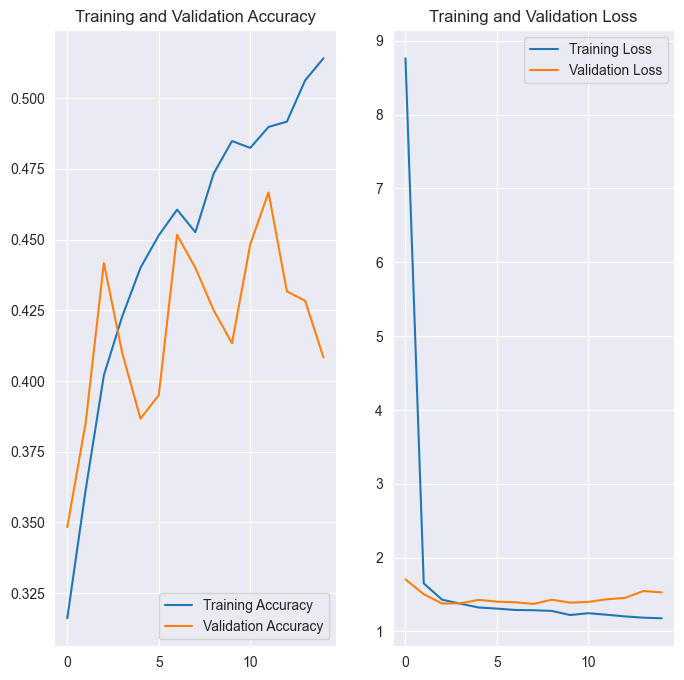

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [119]:
print(f'duration is :{duration}')

duration is :494.6948444843292


In [120]:
pred = new_model.predict(test_X)
pred = pred.argmax(axis=1)

63/63 [==============================] - 3s 39ms/step


In [121]:
accuracy_score(test_y, pred)

0.4255

In [122]:
confusion_matrix(test_y, pred)

array([[168,   9,  43, 161,  19],
       [ 51,  37, 170, 109,  33],
       [ 21,  11, 269,  81,  18],
       [ 53,   8,  44, 282,  13],
       [ 45,  17, 158,  85,  95]], dtype=int64)

# Q3

In [89]:
def visualize_conv_layer(layer_name):
    layer_output = model.get_layer(layer_name).output  #get the Output of the Layer
    intermediate_model = tf.keras.models.Model(inputs=model.input,
                                               outputs=layer_output)  #Intermediate model between Input Layer and Output Layer which we are concerned about
    intermediate_prediction = intermediate_model.predict(
        train_X[2].reshape(1, 128, 128, 3))  #predicting in the Intermediate Node

    row_size = 4
    col_size = 4

    img_index = 0
    print(np.shape(intermediate_prediction))
    #---------------We will subplot the Output of the layer which will be the layer_name----------------------------------#

    fig, ax = plt.subplots(row_size, col_size, figsize=(10, 8))
    plt.grid = False
    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')
            img_index = img_index + 1  #Increment the Index number of img_index variable


print("Function to Visualize the Output has been Created")

Function to Visualize the Output has been Created


1/1 [==============================] - 0s 30ms/step
(1, 64, 64, 16)


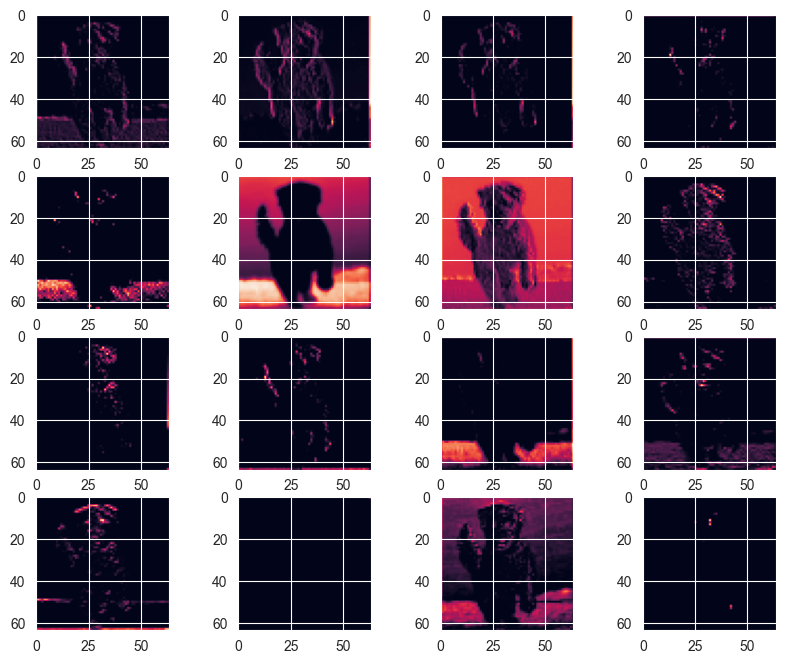

In [40]:
visualize_conv_layer('average_pooling2d_4')


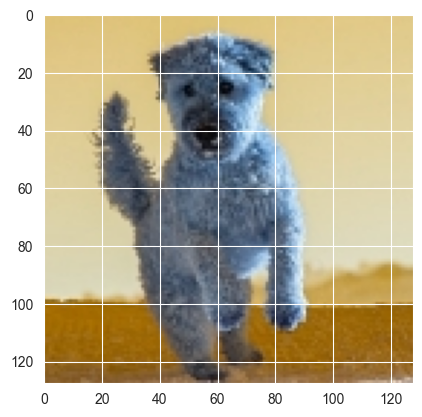

In [38]:
plt.imshow(train_X[2])